In [ ]:
import pandas as pd

dataset_path = '/content/climate_change_dataset.csv'
df = pd.read_csv(dataset_path)
print("Dataset Information:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)    

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])),
                          columns=df.select_dtypes(include=[np.number]).columns)
print("\nMissing values handled.")



Missing values handled.


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)
print("\nData normalization complete.")



Data normalization complete.


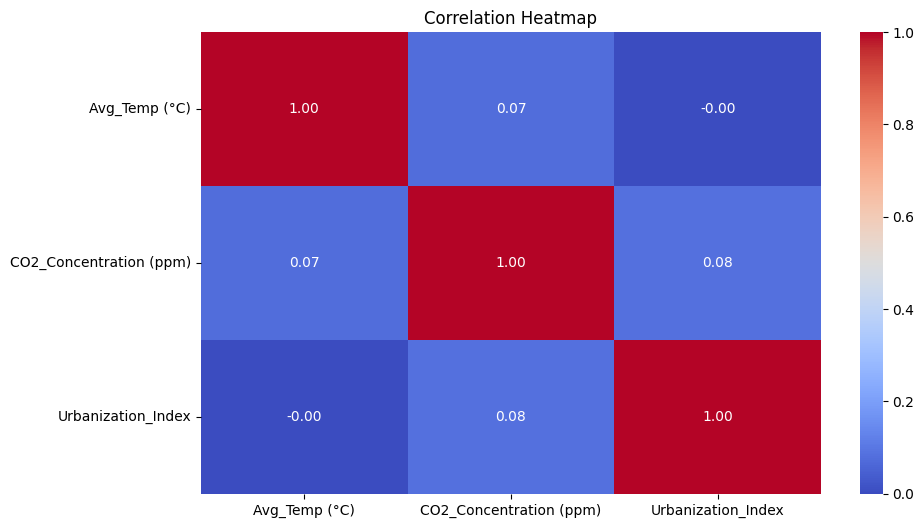

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#Train and evaluate a weather prediction model
import plotly.express as px

fig = px.scatter(df_scaled, x=df_scaled.columns[0], y=df_scaled.columns[1],
                 title="Weather Parameter Correlation")
fig.show()


In [ ]:
print(df.columns)  # To check column names
print(df.info())  # To see data types and null values


Index(['Year', 'Month', 'Avg_Temp (°C)', 'Max_Temp (°C)', 'Min_Temp (°C)',
       'Precipitation (mm)', 'Humidity (%)', 'Wind_Speed (m/s)',
       'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)', 'CO2_Concentration (ppm)',
       'Latitude', 'Longitude', 'Altitude (m)', 'Proximity_to_Water (km)',
       'Urbanization_Index', 'Vegetation_Index', 'ENSO_Index',
       'Particulate_Matter (µg/m³)', 'Sea_Surface_Temp (°C)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object

In [ ]:
#What patterns exist in extreme weather events?
import pandas as pd
import plotly.express as px

# Ensure numeric columns
numeric_cols = ['Avg_Temp (°C)', 'Max_Temp (°C)', 'Min_Temp (°C)',
                'Precipitation (mm)', 'Wind_Speed (m/s)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=numeric_cols, inplace=True)

# Define extreme weather conditions
extreme_weather = df[
    (df['Max_Temp (°C)'] > df['Max_Temp (°C)'].quantile(0.95)) |  # High temperature
    (df['Min_Temp (°C)'] < df['Min_Temp (°C)'].quantile(0.05)) |  # Low temperature
    (df['Precipitation (mm)'] > df['Precipitation (mm)'].quantile(0.95)) |  # Heavy rain
    (df['Wind_Speed (m/s)'] > df['Wind_Speed (m/s)'].quantile(0.95))  # High winds
]

# Display extreme weather events
print("Extreme Weather Events:")
print(extreme_weather)

# Plot extreme temperature events
fig = px.histogram(extreme_weather, x="Max_Temp (°C)", title="Distribution of Extreme Temperature Events", nbins=10)
fig.show()


Extreme Weather Events:
      Year Month  Avg_Temp (°C)  Max_Temp (°C)  Min_Temp (°C)  \
3      NaN   4.0      -0.049863      13.030562      -9.196433   
8   2020.0   9.0      34.282303       4.777629       0.391219   
10  2020.0  11.0      11.442449      16.309470      -8.546003   
16  2021.0   5.0       4.692808      35.397269      14.845233   
19  2021.0   8.0       5.730457      38.712519      12.857216   
23  2021.0  12.0      20.751242      37.245232      12.221870   
47  2023.0  12.0      27.484780       1.543655      -4.258236   
50  2024.0   3.0      12.919545      30.591221      22.031307   

    Precipitation (mm)        Humidity (%)  Wind_Speed (m/s)  \
3           102.454461             Unknown          0.898698   
8           199.450342   96.81856590078783          8.008569   
10          158.671859   53.76671707923877          0.308558   
16        99999.000000   30.87108243855665          4.773137   
19          147.009711   94.34708926029289         11.082275   
23    

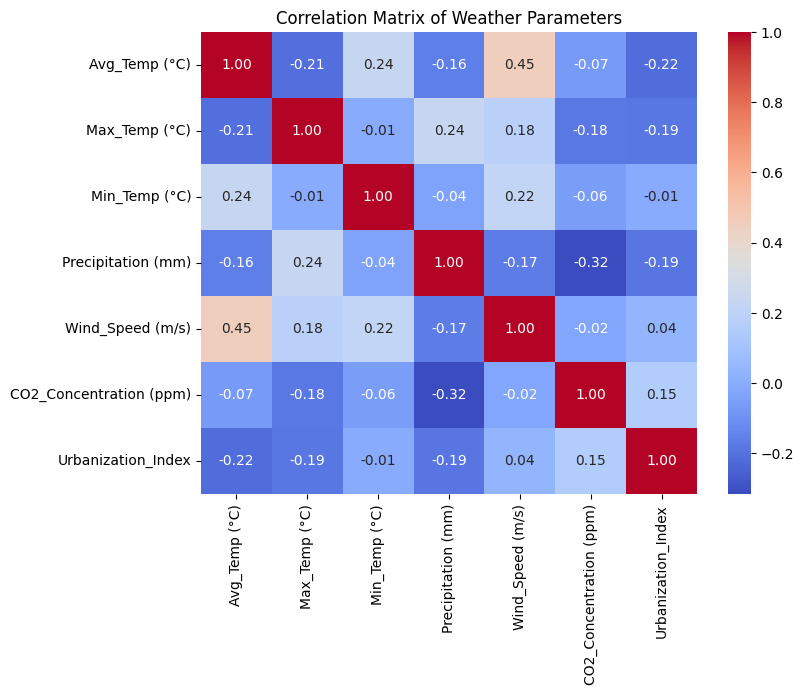

In [ ]:
# Compute correlation matrix, only including numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Visualize correlation using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Weather Parameters")
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Convert 'Year' and 'Month' to a proper Date format (if applicable)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=['Date', 'Avg_Temp (°C)', 'Humidity (%)', 'Precipitation (mm)'], inplace=True)

# Line Chart - Temperature Trends Over Time
fig1 = px.line(df, x='Date', y='Avg_Temp (°C)', title="Temperature Trends Over Time")
fig1.show()

# Scatter Plot - Humidity vs. Precipitation
fig2 = px.scatter(df, x='Humidity (%)', y='Precipitation (mm)', title="Precipitation vs. Humidity", color_continuous_scale='viridis')
fig2.show()

# Box Plot - Distribution of Temperature
fig3 = px.box(df, y='Avg_Temp (°C)', title="Box Plot of Temperature Distribution")
fig3.show()


<ipython-input-25-2925b28fa8ff>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [3]:
import pandas as pd
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor

# Assuming your data is in 'climate_change_dataset.csv'
dataset_path = '/content/climate_change_clean.csv'
df = pd.read_csv(dataset_path)  # Load the DataFrame

# Prepare features and target
features = ['Humidity (%)', 'Precipitation (mm)', 'Wind Speed (km/h)', 'Air Pressure (hPa)']
target = 'Temperature (°C)'

X = df[features]
y = df[target]

# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
fig = px.bar(feature_importance, x='Feature', y='Importance', title="Feature Importance in Predicting Temperature")
fig.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate models
models = {"Linear Regression": lr_pred, "Random Forest": rf_pred}
for model_name, pred in models.items():
    print(f"{model_name} Performance:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
    print("Mean Squared Error:", mean_squared_error(y_test, pred))
    print("R2 Score:", r2_score(y_test, pred))
    print("-" * 40)


Linear Regression Performance:
Mean Absolute Error: 12.430304193860435
Mean Squared Error: 227.82132289358887
R2 Score: -0.49619041013051235
----------------------------------------
Random Forest Performance:
Mean Absolute Error: 11.7155
Mean Squared Error: 213.09386650000002
R2 Score: -0.39946952930235957
----------------------------------------


In [5]:
# Extract month from Date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Define seasons
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}

df['Season'] = df['Month'].map(season_mapping)

# Box plot of temperature by season
fig = px.box(df, x='Season', y='Temperature (°C)', title="Temperature Distribution by Season")
fig.show()
